In [26]:
from gensim.models import Word2Vec
import gensim


model_file = 'rong360_user_history.model'

with open('rong360_user_history.txt') as f:
    prefs_str = ''.join(f.readlines())
print("用户历史记录：")
print(prefs_str)
def read_prefs(prefs_str):
    prefs = {}
    for line in prefs_str.split('\n'):
        parts = line.rstrip().split()
        if len(parts) == 2:
            userId, itemId = parts
            prefs.setdefault(userId, {})
            prefs[userId].update({itemId:1})
    return prefs

prefs = read_prefs(prefs_str)

# print("prefs...")
# print(prefs)

def sents_from_prefs(prefs):
    sents = []
    for v in prefs.values():
        sent = ''
        for b in v.keys():
            sent += ' ' + b.replace(' ', '')
        sents.append(sent)
    return sents

def flatMap(vocab):
    ret = []
    for i in vocab:
        if type(i) == type('a'):
            ret.append(i)
        elif type(i) == type([]):
            for j in i:
                ret.append(j)
    return ret

def calc_item_cf():
    sents = sents_from_prefs(prefs)
#     print("sents.....")
#     print(sents)
    vocab = [s.split() for s in sents]
#     print("vocab.....")
#     print(vocab)
    model = Word2Vec(vocab, size=100, window=5, min_count=1, workers=4,sg=1)
    model.wv.save_word2vec_format(model_file, binary=False)
#     print("positive....")
    
    
    for i, item in enumerate(items):
        print(i, item[0], item[1])
#     model = Word2Vec.load(model_file)
#     print("flatMap........")
#     print(flatMap(vocab))
    print('\n\r 基于产品名称的 word2vec 协同过滤推荐')
    for item in set(flatMap(vocab)):
        print('\n根据 %s 推荐：' % item)
        for item_score in model.most_similar(positive=[item]):
            item, score = item_score
            print('\t%s %.2f' % (item, score))

calc_item_cf()

用户历史记录：
david 融通汇成
david 人人友信-秒贷
david 宁波通商银行-房屋抵押贷
andy 永捷金融-优业贷
jack 平安银行-公积金贷
jack 永捷金融-房产抵押贷
jack 融通汇成
michale 平安普惠-宅E贷
michale 人人友信-秒贷
ann 永捷金融-车抵贷 
ann 融通汇成
ann 阳光财险-阳房贷
joel 阳光财险-优房保B
joel 光大银行-公积金贷
joel 工商银行-经营抵押
joel 杭州银行-企业经营贷
jim 背包十年:我的职业是旅行
jim 阳光财险-优房保B
ray 平安普惠-宅E贷
ray 光大银行-公积金贷
ray 杭州银行-企业经营贷
kity 中信银行-房逸贷
kity 阳光财险-优房保B
kity 平安普惠-宅E贷
kity 商银行-经营抵押
anna 中信银行-房逸贷
anna 永捷金融-房产抵押贷
anna 平安普惠-宅E贷
anna 光大银行-公积金贷
jason 平安普惠-宅E贷
jason 商银行-经营抵押
jason 中信银行-房逸贷
jason 永捷金融-房产抵押贷
rk 永捷金融-房产抵押贷
bak 融通汇成
kavid 平安普惠-宅E贷
kavid 光大银行-公积金贷
kavid 商银行-经营抵押
kavid 融通汇成
0 银行 0.03152504935860634
1 金融 0.021859709173440933
2 抵押 -0.03982890397310257

 基于产品名称的 word2vec 协同过滤推荐

根据 阳光财险-阳房贷 推荐：
	永捷金融-优业贷 0.08
	商银行-经营抵押 0.07
	光大银行-公积金贷 0.06
	永捷金融-房产抵押贷 0.03
	人人友信-秒贷 0.02
	平安普惠-宅E贷 -0.02
	背包十年:我的职业是旅行 -0.02
	平安银行-公积金贷 -0.03
	中信银行-房逸贷 -0.03
	宁波通商银行-房屋抵押贷 -0.04

根据 中信银行-房逸贷 推荐：
	工商银行-经营抵押 0.24
	平安银行-公积金贷 0.12
	阳光财险-优房保B 0.10
	融通汇成 0.09
	平安普惠-宅E贷 0.09
	永捷金融-车抵贷 0.05
	永捷金融-优业贷 -0.00
	背包十年:我的职业是旅行 -0.00
	永捷金

/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).


/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


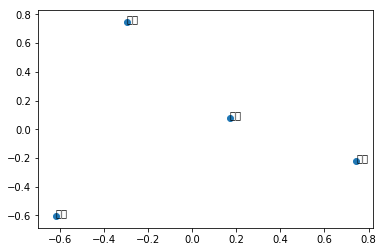

In [28]:
from sklearn.decomposition import PCA
from matplotlib import pyplot
%matplotlib inline
# 利用语料训练模型
# model = Word2Vec(sentences,window=5, min_count=1)

# 基于2d PCA拟合数据
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# 可视化展示
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()